In [2]:
#第6章 50
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('newsCorpora.csv', sep = "\t", names=["ID","TITLE","URL","PUBLISHER","CATEGORY","STORY","HOSTNAME","TIMESTAMP"])
df = df[(df["PUBLISHER"] == "Reuters") | (df["PUBLISHER"] == "Huffington Post") | (df["PUBLISHER"] == "Businessweek") | (df["PUBLISHER"] == "Contactmusic.com") | (df["PUBLISHER"] == "Daily Mail")]
df1 = df[["TITLE", "CATEGORY"]]
df2 = df1.replace('"', '')

print(df1["TITLE"].head(5))

train, valid = train_test_split(df2, test_size=0.2)
valid, test = train_test_split(valid, test_size=0.5)


train.to_csv('train.txt', sep='\t', index=False)
valid.to_csv('valid.txt', sep='\t', index=False)
test.to_csv('test.txt', sep='\t', index=False)

print("train")
print("b" + "\t", len(train[train["CATEGORY"] == "b"]))
print("t" + "\t", len(train[train["CATEGORY"] == "t"]))
print("e" + "\t", len(train[train["CATEGORY"] == "e"]))
print("m" + "\t", len(train[train["CATEGORY"] == "m"]))

print("\n" + "valid")
print("b" + "\t", len(valid[valid["CATEGORY"] == "b"]))
print("t" + "\t", len(valid[valid["CATEGORY"] == "t"]))
print("e" + "\t", len(valid[valid["CATEGORY"] == "e"]))
print("m" + "\t", len(valid[valid["CATEGORY"] == "m"]))

12         Europe reaches crunch point on banking union
13    ECB FOCUS-Stronger euro drowns out ECB's messa...
19    Euro Anxieties Wane as Bunds Top Treasuries, S...
20    Noyer Says Strong Euro Creates Unwarranted Eco...
29    REFILE-Bad loan triggers key feature in ECB ba...
Name: TITLE, dtype: object
train
b	 4485
t	 1247
e	 4230
m	 710

valid
b	 552
t	 147
e	 523
m	 112


In [3]:
#第6章 51
from sklearn.feature_extraction.text import TfidfVectorizer
def feature(corpus):
  vectorizer = TfidfVectorizer()
  X = vectorizer.fit_transform(corpus)
  return pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

df_a = pd.concat([feature(train["TITLE"]), feature(valid["TITLE"]), feature(test["TITLE"])])
df_ac = df_a.fillna(0)

train_l, valid_l = train_test_split(df_ac, test_size=0.2, shuffle=False)
valid_l, test_l = train_test_split(valid_l, test_size=0.5, shuffle=False)

train_l.to_csv('train.feature.txt', sep='\t', index=False)
valid_l.to_csv('valid.feature.txt', sep='\t', index=False)
test_l.to_csv('test.feature.txt', sep='\t', index=False)

print(valid_l)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


       00   05   08   09  0ff   10  100  1000  10000  100000  ...  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   
...   ...  ...  ...  ...  ...  ...  ...   ...    ...     ...  ...   
1329  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   
1330  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   
1331  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   
1332  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   
1333  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   

      worldsmosttalkedaboutcouple  wounds  wrestles  wristband  wrongdoing  \
0                             0.0     0.0       0.0        0.0         0.0   
1              

In [6]:
#第6章 52
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_l, train["CATEGORY"])

LogisticRegression()

In [8]:
#第6章 53
import numpy as np
Y_pred = lr.predict(train_l)
Y_pred_brob = lr.predict_proba(train_l)
train_re = train.reset_index(drop=True)
index = 0
prob_train_list = []
for i in Y_pred_brob:
  if train_re.at[train_re.index[index], "CATEGORY"] == "b":
    prob_train_list.append(i[0])
  elif train_re.at[train_re.index[index], "CATEGORY"] == "e":
    prob_train_list.append(i[1])
  elif train_re.at[train_re.index[index], "CATEGORY"] == "m":
    prob_train_list.append(i[2])
  else:
    prob_train_list.append(i[3])
  index += 1

prob_c_train_list = []
for i in Y_pred_brob:
  if np.max(i) == i[0]:
    prob_c_train_list.append("b")
  elif np.max(i) == i[1]:
    prob_c_train_list.append("e")
  elif np.max(i) == i[2]:
    prob_c_train_list.append("m")
  else:
    prob_c_train_list.append("t")

print(Y_pred, prob_c_train_list[0:3])
print(Y_pred, prob_train_list[0:3])
print(Y_pred, Y_pred_brob)
print(Y_pred, np.max(Y_pred_brob, axis = 1))

['b' 't' 't' ... 'e' 'b' 'b'] ['b', 't', 't']
['b' 't' 't' ... 'e' 'b' 'b'] [0.9524042397818546, 0.6277315413593133, 0.6277373533280736]
['b' 't' 't' ... 'e' 'b' 'b'] [[0.95240424 0.01568435 0.00961201 0.0222994 ]
 [0.21804812 0.11021258 0.04400776 0.62773154]
 [0.26422838 0.08302055 0.02501371 0.62773735]
 ...
 [0.0512881  0.89796175 0.01970877 0.03104138]
 [0.93226458 0.01502006 0.01571787 0.03699749]
 [0.96126828 0.01225094 0.00745969 0.0190211 ]]
['b' 't' 't' ... 'e' 'b' 'b'] [0.95240424 0.62773154 0.62773735 ... 0.89796175 0.93226458 0.96126828]


In [9]:
#第6章 53
Y_pred = lr.predict(test_l)
Y_pred_brob = lr.predict_proba(test_l)
test_re = test.reset_index(drop=True)
index = 0
prob_list = []
for i in Y_pred_brob:
  if test_re.at[test_re.index[index], "CATEGORY"] == "b":
    prob_list.append(i[0])
  elif test_re.at[test_re.index[index], "CATEGORY"] == "e":
    prob_list.append(i[1])
  elif test_re.at[test_re.index[index], "CATEGORY"] == "m":
    prob_list.append(i[2])
  else:
    prob_list.append(i[3])
  index += 1

prob_c_list = []
for i in Y_pred_brob:
  if np.max(i) == i[0]:
    prob_c_list.append("b")
  elif np.max(i) == i[1]:
    prob_c_list.append("e")
  elif np.max(i) == i[2]:
    prob_c_list.append("m")
  else:
    prob_c_list.append("t")

print(Y_pred, prob_c_list[0:3])
print(Y_pred, prob_list[0:3])
print(Y_pred, Y_pred_brob)
print(Y_pred, np.max(Y_pred_brob, axis = 1))

['b' 'b' 'e' ... 'b' 'e' 'b'] ['b', 'b', 'e']
['b' 'b' 'e' ... 'b' 'e' 'b'] [0.8576222511524064, 0.14243009111482513, 0.7295377154153154]
['b' 'b' 'e' ... 'b' 'e' 'b'] [[0.85762225 0.06380823 0.02266841 0.05590111]
 [0.41226521 0.35987692 0.08542778 0.14243009]
 [0.10329711 0.72953772 0.07780898 0.08935619]
 ...
 [0.94956571 0.03243336 0.00600649 0.01199444]
 [0.04219972 0.90392276 0.01980498 0.03407253]
 [0.79822017 0.14309935 0.03516409 0.0235164 ]]
['b' 'b' 'e' ... 'b' 'e' 'b'] [0.85762225 0.41226521 0.72953772 ... 0.94956571 0.90392276 0.79822017]


In [11]:
#第6章 54
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('accuracy = ', accuracy_score(train['CATEGORY'], prob_c_train_list))
print('accuracy = ', accuracy_score(test['CATEGORY'], prob_c_list))

accuracy =  0.9473388305847077
accuracy =  0.8920539730134932


In [12]:
#第6章 55
print('confusion matrix = \n', confusion_matrix(train['CATEGORY'], prob_c_train_list))
print('confusion matrix = \n', confusion_matrix(test['CATEGORY'], prob_c_list))

confusion matrix = 
 [[4403   51    2   29]
 [  18 4209    0    3]
 [  76  126  502    6]
 [ 144  106    1  996]]
confusion matrix = 
 [[552  26   1  11]
 [  6 518   0   2]
 [ 12  27  43   6]
 [ 28  25   0  77]]


In [22]:
#第6章 56
print(["b", "e", "m", "t"])
print('precision = ', precision_score(test['CATEGORY'], prob_c_list, average=None, labels=['b', 'e', 't', 'm']))
print('pre_macro_ave = ', precision_score(test['CATEGORY'], prob_c_list, average="macro", labels=['b', 'e', 't', 'm']))
print('pre_micro_ave = ', precision_score(test['CATEGORY'], prob_c_list, average="micro", labels=['b', 'e', 't', 'm']))
print('recall = ', recall_score(test['CATEGORY'], prob_c_list, average=None, labels=['b', 'e', 't', 'm']))
print('rec_macro_ave = ', recall_score(test['CATEGORY'], prob_c_list, average="macro", labels=['b', 'e', 't', 'm']))
print('rec_micro_ave = ', recall_score(test['CATEGORY'], prob_c_list, average="micro", labels=['b', 'e', 't', 'm']))
print('f1 score = ', f1_score(test['CATEGORY'], prob_c_list, average=None, labels=['b', 'e', 't', 'm']))
print('f1_macro_ave = ', f1_score(test['CATEGORY'], prob_c_list, average="macro", labels=['b', 'e', 't', 'm']))
print('f1_micro_ave = ',f1_score(test['CATEGORY'], prob_c_list, average="micro", labels=['b', 'e', 't', 'm']))

['b', 'e', 'm', 't']
precision =  [0.92307692 0.86912752 0.80208333 0.97727273]
pre_macro_ave =  0.8928901251153769
pre_micro_ave =  0.8920539730134932
recall =  [0.93559322 0.98479087 0.59230769 0.48863636]
rec_macro_ave =  0.7503320377019385
rec_micro_ave =  0.8920539730134932
f1 score =  [0.92929293 0.92335116 0.68141593 0.65151515]
f1_macro_ave =  0.7963937921642243
f1_micro_ave =  0.8920539730134932


In [136]:
print(lr.coef_)
for i in lr.coef:
  for j in i:
    


[[ 0.18890023 -0.00521476  0.0759617  ...  0.          0.
   0.        ]
 [-0.12117326  0.0092919  -0.04749099 ...  0.          0.
   0.        ]
 [-0.03219806 -0.00150973 -0.01265478 ...  0.          0.
   0.        ]
 [-0.03552891 -0.00256741 -0.01581593 ...  0.          0.
   0.        ]]


In [24]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] [0.4202586206896552, 0.4393740629685157, 0.7657421289355323, 0.7921664167916042, 0.9473388305847077, 0.9981259370314842, 0.9992503748125937, 0.9993440779610195, 0.9993440779610195]


<function matplotlib.pyplot.show>

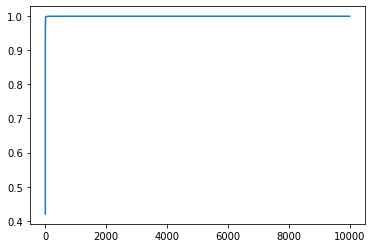

In [40]:
#第6章 58
import matplotlib.pyplot as plt
c_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
accuracy_list = []
for C in c_list:
  lr = LogisticRegression(C=float(C))
  lr.fit(train_l, train["CATEGORY"])
  Y_pred = lr.predict(train_l)
  Y_pred_brob = lr.predict_proba(train_l)
  train_re = train.reset_index(drop=True)
  index = 0
  prob_train_list = []
  for i in Y_pred_brob:
    if train_re.at[train_re.index[index], "CATEGORY"] == "b":
      prob_train_list.append(i[0])
    elif train_re.at[train_re.index[index], "CATEGORY"] == "e":
      prob_train_list.append(i[1])
    elif train_re.at[train_re.index[index], "CATEGORY"] == "m":
      prob_train_list.append(i[2])
    else:
      prob_train_list.append(i[3])
    index += 1

  prob_c_train_list = []
  for i in Y_pred_brob:
    if np.max(i) == i[0]:
      prob_c_train_list.append("b")
    elif np.max(i) == i[1]:
      prob_c_train_list.append("e")
    elif np.max(i) == i[2]:
      prob_c_train_list.append("m")
    else:
      prob_c_train_list.append("t")
 
  accuracy_list.append(accuracy_score(train['CATEGORY'], prob_c_train_list))
print(c_list, accuracy_list)  
plt.plot(c_list, accuracy_list)
plt.show

<function matplotlib.pyplot.show>

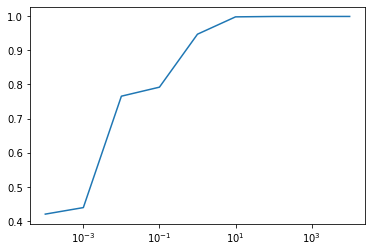

In [42]:
import matplotlib.pyplot as plt
x = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] 
y = [0.4202586206896552, 0.4393740629685157, 0.7657421289355323, 0.7921664167916042, 0.9473388305847077, 0.9981259370314842, 0.9992503748125937, 0.9993440779610195, 0.9993440779610195] 
plt.plot(x, y)
plt.xscale ('log')
plt.show

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] [0.41379310344827586, 0.43778110944527737, 0.7361319340329835, 0.7556221889055472, 0.8740629685157422, 0.9010494752623688, 0.904047976011994, 0.8995502248875562, 0.8973013493253373]


<function matplotlib.pyplot.show>

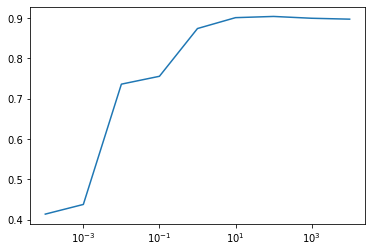

In [45]:
c_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
accuracy_list = []
for C in c_list:
  lr = LogisticRegression(C=float(C))
  lr.fit(train_l, train["CATEGORY"])
  Y_pred = lr.predict(valid_l)
  Y_pred_brob = lr.predict_proba(valid_l)
  valid_re = valid.reset_index(drop=True)
  index = 0
  prob_valid_list = []
  for i in Y_pred_brob:
    if valid_re.at[valid_re.index[index], "CATEGORY"] == "b":
      prob_valid_list.append(i[0])
    elif valid_re.at[valid_re.index[index], "CATEGORY"] == "e":
      prob_valid_list.append(i[1])
    elif valid_re.at[valid_re.index[index], "CATEGORY"] == "m":
      prob_valid_list.append(i[2])
    else:
      prob_valid_list.append(i[3])
    index += 1

  prob_c_valid_list = []
  for i in Y_pred_brob:
    if np.max(i) == i[0]:
      prob_c_valid_list.append("b")
    elif np.max(i) == i[1]:
      prob_c_valid_list.append("e")
    elif np.max(i) == i[2]:
      prob_c_valid_list.append("m")
    else:
      prob_c_valid_list.append("t")
 
  accuracy_list.append(accuracy_score(valid['CATEGORY'], prob_c_valid_list))
print(c_list, accuracy_list)
plt.xscale ('log')  
plt.plot(c_list, accuracy_list)
plt.show

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] [0.44227886056971516, 0.46551724137931033, 0.7691154422788605, 0.802848575712144, 0.8920539730134932, 0.9145427286356822, 0.9130434782608695, 0.9107946026986506, 0.9115442278860569]


<function matplotlib.pyplot.show>

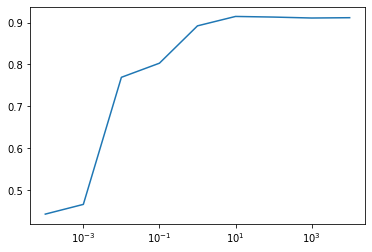

In [47]:
c_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
accuracy_list = []
for C in c_list:
  lr = LogisticRegression(C=float(C))
  lr.fit(train_l, train["CATEGORY"])
  Y_pred = lr.predict(test_l)
  Y_pred_brob = lr.predict_proba(test_l)
  test_re = test.reset_index(drop=True)
  index = 0
  prob_test_list = []
  for i in Y_pred_brob:
    if test_re.at[test_re.index[index], "CATEGORY"] == "b":
      prob_test_list.append(i[0])
    elif test_re.at[test_re.index[index], "CATEGORY"] == "e":
      prob_test_list.append(i[1])
    elif test_re.at[test_re.index[index], "CATEGORY"] == "m":
      prob_test_list.append(i[2])
    else:
      prob_test_list.append(i[3])
    index += 1

  prob_c_test_list = []
  for i in Y_pred_brob:
    if np.max(i) == i[0]:
      prob_c_test_list.append("b")
    elif np.max(i) == i[1]:
      prob_c_test_list.append("e")
    elif np.max(i) == i[2]:
      prob_c_test_list.append("m")
    else:
      prob_c_test_list.append("t")
 
  accuracy_list.append(accuracy_score(test['CATEGORY'], prob_c_test_list))
print(c_list, accuracy_list)
plt.xscale ('log')  
plt.plot(c_list, accuracy_list)
plt.show